# Regression - Part 1 - Problem 2

# Load the data

https://towardsdatascience.com/outlier-detection-in-regression-using-cooks-distance-f5e4954461a0

In [3]:
import numpy as np
import pandas as pd

X_train = np.load('Xtrain_Regression_Part2.npy')
Y_train = np.load('Ytrain_Regression_Part2.npy')

X_test = np.load('Xtest_Regression_Part2.npy')


df = pd.DataFrame(X_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.096306,0.103394,-0.041093,-0.036073,-0.051363,0.175977,-0.002615,0.021736,-0.110863,0.068009,0.058208,0.118485,0.102668,0.040101,0.190118,0.014326,0.066005,-0.040918,0.036576,-0.050878
std,0.947031,0.950758,1.073739,1.007231,0.992275,0.995634,0.924536,1.125673,1.117951,0.937170,1.024629,0.915533,0.929227,0.987411,1.113879,0.981693,0.918804,0.880285,1.065829,1.030510
min,-2.237765,-1.694381,-3.433329,-2.851244,-2.558154,-1.788471,-1.965246,-3.310151,-2.953069,-2.286955,-2.027333,-2.017503,-2.584288,-2.372827,-1.984497,-2.286663,-2.240194,-2.006596,-2.560387,-2.830737
25%,-0.776680,-0.552726,-0.619567,-0.601832,-0.657576,-0.555407,-0.648780,-0.656277,-0.986965,-0.522125,-0.713441,-0.397109,-0.474409,-0.523735,-0.656624,-0.766512,-0.639798,-0.581918,-0.738254,-0.846551
50%,-0.122215,0.065946,-0.058747,-0.074514,0.045014,0.154525,-0.107089,0.125309,-0.009224,-0.042286,0.074529,0.077402,0.180081,0.025515,0.098189,0.098965,0.130909,-0.017476,0.145513,0.067945
75%,0.554967,0.700684,0.631118,0.699446,0.593339,0.780462,0.607118,0.660079,0.704632,0.642025,0.767151,0.709581,0.761737,0.648176,0.886054,0.728499,0.734412,0.458716,0.777096,0.696973
max,2.435484,2.290980,3.020603,2.168331,1.907413,2.934458,2.130421,3.019401,2.074649,2.425904,2.670014,2.175048,2.022771,3.159331,3.076485,2.431136,2.003396,1.909748,2.730227,2.093984


# Plot the boxplots to visualize the outliers

In [13]:
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
#np.random.seed(10)
#data = X_train
 
#fig = plt.figure(figsize =(10, 7))
 
# Creating plot
#plt.boxplot(data)
 
# show plot
#plt.show()

# Standardize features by removing the mean and scaling to unit variance.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)

#df1 = pd.DataFrame(x_train_scaled)
#df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.665335e-18,-2.040035e-17,2.220446e-18,-3.996803e-17,2.664535e-17,1.498801e-17,-3.164136e-17,2.220446e-17,-1.554312e-17,1.665335e-18,5.329071e-17,-4.884981e-17,2.220446e-18,-3.441691e-17,-2.775558e-18,2.109424e-17,-3.552714e-17,5.551115e-18,-2.664535e-17,-1.609823e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.272625e+00,-1.900413e+00,-3.175190e+00,-2.809041e+00,-2.539035e+00,-1.983001e+00,-2.133523e+00,-2.974817e+00,-2.555143e+00,-2.525505e+00,-2.045665e+00,-2.344807e+00,-2.906169e+00,-2.456001e+00,-1.962125e+00,-2.355707e+00,-2.522646e+00,-2.244252e+00,-2.448842e+00,-2.711147e+00
25%,-7.220468e-01,-6.935783e-01,-5.414616e-01,-5.645269e-01,-6.140108e-01,-7.382908e-01,-7.024283e-01,-6.053525e-01,-7.876155e-01,-6.328700e-01,-7.568947e-01,-5.659994e-01,-6.241577e-01,-5.739008e-01,-7.640036e-01,-7.994066e-01,-7.720458e-01,-6.176693e-01,-7.306359e-01,-7.760052e-01
50%,-2.749618e-02,-3.958602e-02,-1.652510e-02,-3.835683e-02,9.761596e-02,-2.165421e-02,-1.135712e-01,9.247274e-02,9.137390e-02,-1.182818e-01,1.600933e-02,-4.509908e-02,8.372855e-02,-1.484607e-02,-8.294597e-02,8.665184e-02,7.099593e-02,2.676489e-02,1.027237e-01,1.158859e-01
75%,6.911643e-01,6.313902e-01,6.292004e-01,7.339178e-01,6.529941e-01,6.101946e-01,6.628241e-01,5.699330e-01,7.331304e-01,6.155852e-01,6.953877e-01,6.488834e-01,7.128388e-01,6.189305e-01,6.279327e-01,7.311566e-01,7.311402e-01,5.704427e-01,6.982838e-01,7.293657e-01
max,2.686865e+00,2.312479e+00,2.865798e+00,2.199604e+00,1.983970e+00,2.784534e+00,2.318765e+00,2.676412e+00,1.964776e+00,2.528649e+00,2.561867e+00,2.257618e+00,2.076754e+00,3.174911e+00,2.604329e+00,2.474283e+00,2.119224e+00,2.227114e+00,2.540015e+00,2.091846e+00


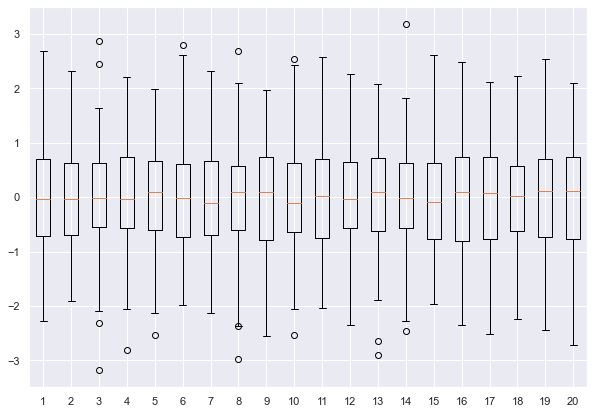

In [15]:
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
data = x_train_scaled
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

# Define cross-validation method

In [16]:
from sklearn.model_selection import RepeatedKFold

round_digits = 7
random_state = 1
#random_state = None

# define model evaluation method (repeats k-folds n times, with k-folds=n_splits and n=n_repeats)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=random_state)

# OLS with cross-validation

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from numpy import absolute

# Ordinary least squares Linear Regression
lr = LinearRegression()
lr.fit(x_train_scaled, Y_train)

# Evaluate the model with cross-validation 
score = cross_val_score(lr, x_train_scaled, Y_train, cv=cv, scoring='neg_mean_squared_error')

OLS_MSE = round(absolute(score.mean()), round_digits)

print('Coef.:', lr.coef_)
print('Intercept.:', lr.intercept_)
print("MSE:", OLS_MSE, '  std:', round(score.std(), round_digits))


Coef.: [[ 0.86476382 -0.0782559  -0.220897    0.08666146 -1.21094778 -0.74048044
  -0.03217447  0.02262833  1.27329019 -0.02962069 -0.0570129   1.25677608
   0.10617605 -0.01549097  0.31303189  0.44268159  0.55151824 -0.33164366
   0.76961722  0.46796429]]
Intercept.: [-0.02584225]
MSE: 2.0650802   std: 3.8182864


# Lasso regularization model with cross-validation

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()

# 1st try for tunning values of alpha 
# parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
# Results:
# Lasso best params: {'alpha': 0.01}
# Lasso MSE: 

# Fine tune  for values of alpha
parameters = {'alpha': np.arange(0.001, 0.1, 0.001)}

lasso_lr = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = cv, verbose=1)
lasso_lr.fit(x_train_scaled, Y_train)

print('Lasso Coef.:', lasso_lr.best_estimator_.coef_)
print('Lasso Intercept:', lasso_lr.best_estimator_.intercept_)

print('Lasso best params:', lasso_lr.best_params_ )

lasso_MSE = round(np.absolute(lasso_lr.best_score_), round_digits)
print('Lasso MSE:', lasso_MSE)

Fitting 30 folds for each of 99 candidates, totalling 2970 fits
Lasso Coef.: [ 0.82311757 -0.06549022 -0.16334619  0.         -1.19733754 -0.69212358
 -0.01535404  0.          1.2345708  -0.         -0.03616455  1.19608079
  0.04837262 -0.          0.26817516  0.38851657  0.51089009 -0.27449747
  0.73694602  0.39726821]
Lasso Intercept: [-0.02584225]
Lasso best params: {'alpha': 0.037000000000000005}
Lasso MSE: 1.9944577


In [16]:
from sklearn.linear_model import HuberRegressor, LinearRegression ,Ridge ,SGDRegressor,  ElasticNet, PassiveAggressiveRegressor
from sklearn.svm import LinearSVR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.impute import SimpleImputer # imputer for missing values
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
#RawData=pd.read_excel("Outlier Regression.xlsx")
#Data=RawData.drop(["Target"], axis=1)


# Data = pd.DataFrame(x_train_scaled)
# sns.set(rc={'figure.figsize':(17,17)})
# sns.heatmap(Data.corr(), cmap="YlGnBu", annot=True)
# plt.show()
# sns.set(rc={'figure.figsize':(8,8)})
# sns.boxplot(data=Data, orient="h",palette="Set2")
# plt.show()

#print (Data.info())
#print(Data.describe())
#imputer = SimpleImputer(strategy="mean")
#imputer.fit(Data)
#TransformData = imputer.transform(Data)
#X=pd.DataFrame(TransformData, columns=Data.columns)
#print (X.info())
#vif = pd.DataFrame()
#vif["features"] = X.columns
#vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print('VIF: ', vif)
#y=pd.DataFrame(Y_train)
y=Y_train
Huber = HuberRegressor()
Linear = LinearRegression()
SGD= SGDRegressor()
Ridge=Ridge()
SVR=LinearSVR()
Elastic=ElasticNet(random_state=0)
PassiveAggressiveRegressor= PassiveAggressiveRegressor()
estimators = [Linear,SGD,SVR,Huber, Ridge, Elastic,PassiveAggressiveRegressor]


In [22]:
#print(type(Data))
#print(Data.shape)
#print(X.shape)

print (estimators)



[LinearRegression(), SGDRegressor(), LinearSVR(), HuberRegressor(), Ridge(), ElasticNet(random_state=0), PassiveAggressiveRegressor()]


In [ ]:
for i in estimators:
    reg= i.fit(X_train, Y_train)
    
    print(str(i)+" Coefficients:", np.round(i.coef_,2))
    print("**************************")

In [ ]:
https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/
https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html



# Multivariate outliers removal
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/



In [43]:
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# set the seed
seed(1) 

# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
 
 
# load dataset
#X, y = get_dataset()

# define the model
model = HuberRegressor()

# evaluate model
#results = evaluate_model(X_train, Y_train, model)
results = evaluate_model(X_train, Y_train.ravel(), model)

print('Mean MSE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
#plot_best_fit(X, y, model)

Mean MSE: 1.671 (4.101)


In [13]:
print(Y_train.shape)
print(Y_train.ravel().shape)

(100, 1)
(100,)


In [48]:
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.svm import LinearSVR

Linear = LinearRegression()
Ridge=Ridge()
Lasso=Lasso()
Huber = HuberRegressor()
Ransac=RANSACRegressor()
Theil=TheilSenRegressor()
estimators = [Linear, Ridge, Lasso, Huber, Ransac, Theil]

# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)



In [49]:
for model in estimators:
    print('Model: ', model)
    results = evaluate_model(X_train, Y_train.ravel(), model)
    print('Mean MSE (std): %.3f (%.3f)' % (mean(results), std(results)))

Model:  LinearRegression()
Mean MSE (std): 2.065 (3.818)
Model:  Ridge()
Mean MSE (std): 2.050 (3.789)
Model:  Lasso()
Mean MSE (std): 7.981 (3.841)
Model:  HuberRegressor()
Mean MSE (std): 1.671 (4.101)
Model:  RANSACRegressor()
Mean MSE (std): 1.660 (4.076)
Model:  TheilSenRegressor(max_subpopulation=10000)
Mean MSE (std): 1.653 (4.056)
